In [ ]:
# Decision Tree _ensemble_learning 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("BreastCancer.csv")

In [4]:
df=data.copy()
df.head(2)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0


In [5]:
df.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [6]:
# although in medical data set it is not recoomended to use imputation approach
# but just fpor learning we are doing .
df["Bare.nuclei"]=df["Bare.nuclei"].fillna(df["Bare.nuclei"].mean())

In [7]:
df.isnull().sum().sum()

0

In [8]:
df["Class"].value_counts(normalize=True)

0    0.655222
1    0.344778
Name: Class, dtype: float64

In [9]:
X=df.drop(["Id",'Class'],axis=1)
Y=df["Class"]

# for the tree based algorithms --- Scaling and outlier treatment is not required

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [12]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [13]:
# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
#dt=DecisionTreeClassifier(class_weight="balanced",criterion='gini',max_depth=None,min_samples_split=4,ccp_alpha=0)
dt=DecisionTreeClassifier(class_weight="balanced",criterion='entropy',max_depth=None,min_samples_split=4,ccp_alpha=0)

In [16]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0, class_weight='balanced',
                       criterion='entropy', min_samples_split=4)

In [17]:
Y_pred_test=dt.predict(X_test)

In [18]:
accuracy_score(Y_test,Y_pred_test)

0.9071428571428571

In [19]:
dt.score(X_test,Y_test)

0.9071428571428571

In [20]:
dt.score(X_train,Y_train)

0.9910554561717353

In [20]:
# drawing the tree

In [21]:
from sklearn import tree

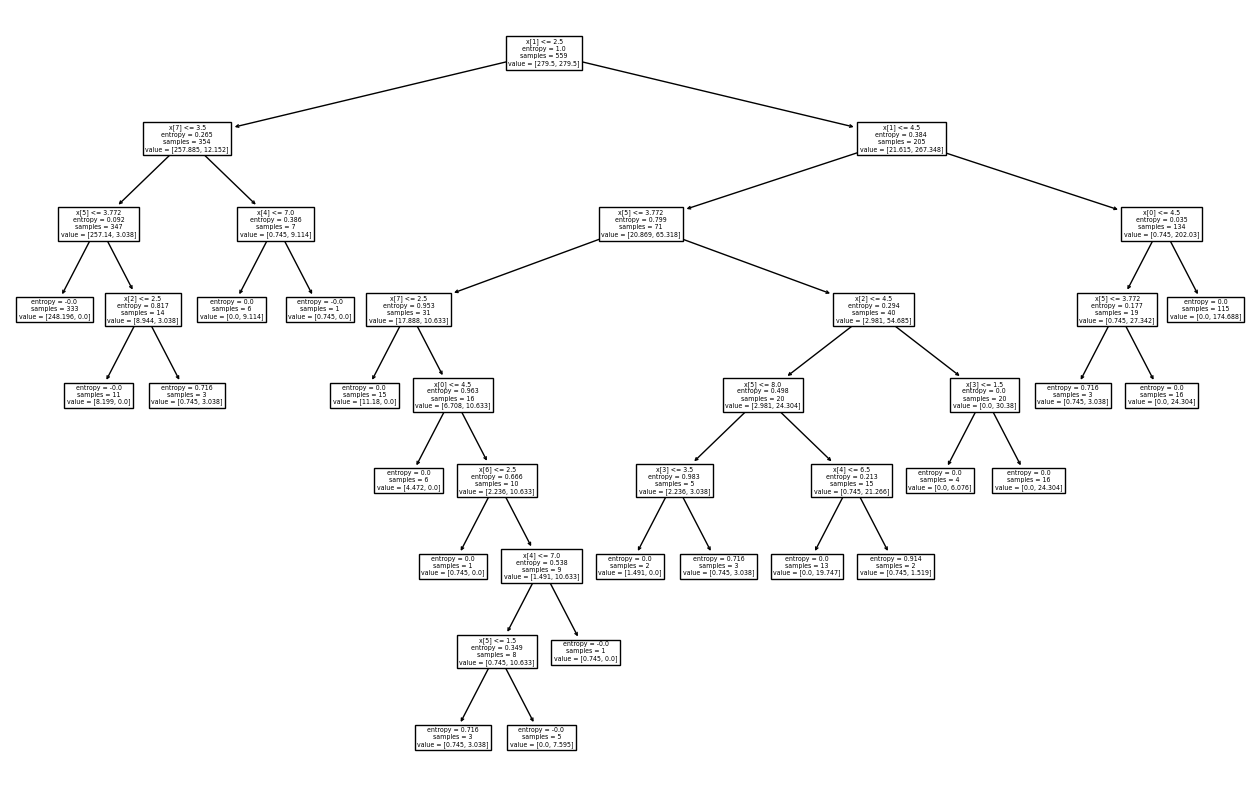

In [22]:
plt.figure(figsize=(16,10))
tree.plot_tree(dt)
plt.show()

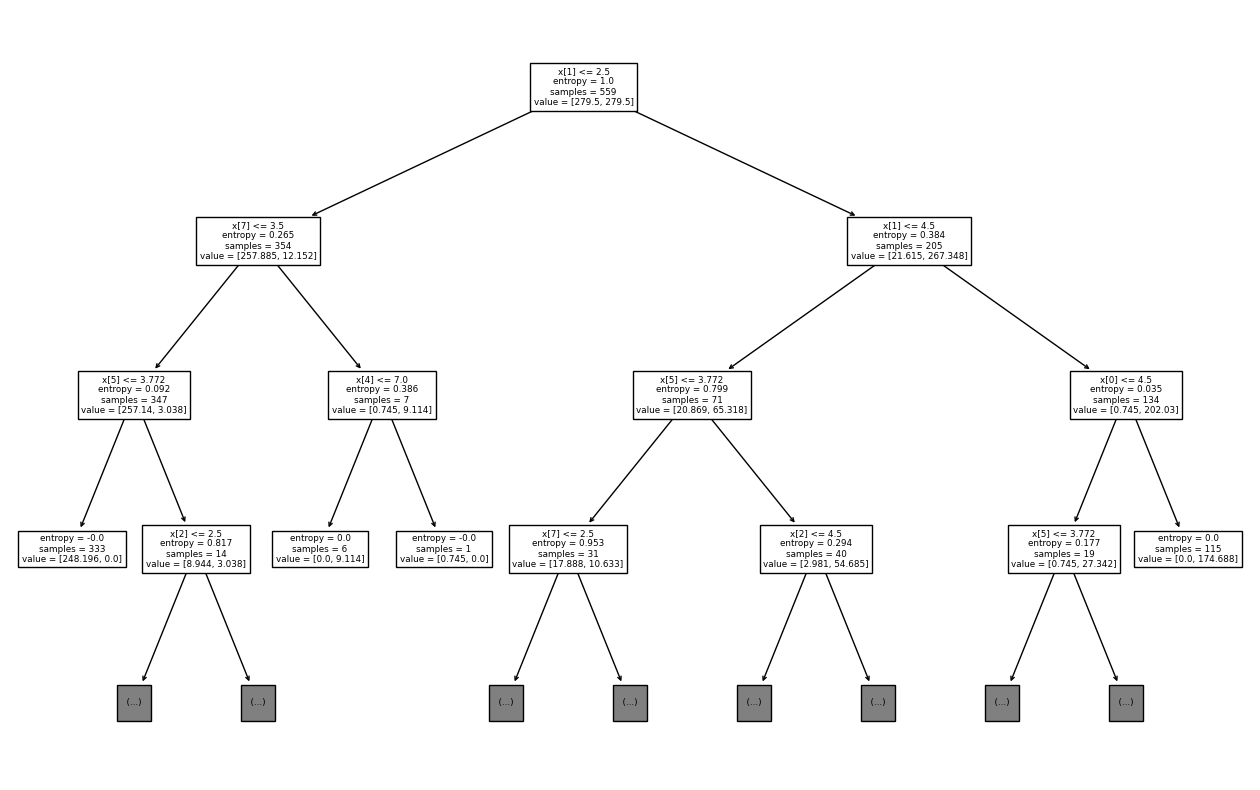

In [23]:
plt.figure(figsize=(16,10))
tree.plot_tree(dt,max_depth=3)
plt.show()

In [24]:
# cross validation approach
from sklearn.model_selection import cross_val_score,KFold


In [25]:
kf=KFold(n_splits=5)
DT=DecisionTreeClassifier(class_weight="balanced",criterion='entropy',max_depth=None,min_samples_split=4,ccp_alpha=0)

In [26]:
scores=cross_val_score(DT,X,Y,cv=kf,scoring="accuracy")

print(scores)

[0.88571429 0.94285714 0.92142857 0.96428571 0.96402878]


In [27]:
np.mean(scores)

0.9356628982528263

In [28]:
np.std(scores)

0.029574062228984312

# hyper parameter optimization

(1)GridSearchCV- 
(2)RandomizedSearchCV

In [29]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

In [30]:
dt=DecisionTreeClassifier()

In [31]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [32]:
param_grid={"criterion":["gini","entropy"],
           "splitter":["best","random"],
           "max_depth":(2,20,1)}

In [33]:
param_grid

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': (2, 20, 1)}

In [34]:
random_dt=RandomizedSearchCV(dt,param_grid,cv=5,n_iter=40)

In [35]:
%%time 
random_dt.fit(X,Y)
print("best parameters", random_dt.best_params_)


best parameters {'splitter': 'random', 'max_depth': 20, 'criterion': 'entropy'}
CPU times: total: 297 ms
Wall time: 418 ms


In [36]:
# random_dt will be the version of dt (decisiontree having optimized parameters)

In [37]:
random_dt.best_score_

0.9413463514902365

In [38]:
random_dt.score(X_train,Y_train)

1.0

In [39]:
random_dt.score(X_test,Y_test)

1.0

# grid search CV

In [40]:
grid_dt=GridSearchCV(dt,param_grid,cv=5)

In [41]:
%%time 
grid_dt.fit(X,Y)
print("best parameters", grid_dt.best_params_)


best parameters {'criterion': 'gini', 'max_depth': 20, 'splitter': 'random'}
CPU times: total: 312 ms
Wall time: 326 ms


In [42]:
grid_dt.best_score_

0.951377183967112

In [43]:
grid_dt.score(X_train,Y_train)

1.0

In [44]:
grid_dt.score(X_test,Y_test)

1.0

In [45]:
# Ensemble learning -- WE ARE TAKING THE ADVICE FROM DIFFERNT CONSULTANTS

(1)Bagging method--- Random forest , Bagging
(2)Boosting Method---adaboost , gradient boosting,XGBoost,Catboost,lightGBM
(3)Voting approach---we apply different algo(DT,RF,KNN,SVM,ADB,XGB)- soft voting/hard voding 
(4)Stacking approach----we apply different algo(DT,RF,KNN,SVM,ADB,XGB)-- it will make one algo(for example logistic regression ) 
as the most powerful. 

In [46]:
# PCA -- IN DETAIL-   LDA, T-SEN
# CLUSTERING APPROACH (unsupervised ML) ---
#  Naive bayes --

In [47]:
# project session 

In [48]:
# ensemble learning Bagging approach

In [49]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier

In [50]:
rf=RandomForestClassifier()

In [51]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [52]:
rf.score(X_train,Y_train)

1.0

In [53]:
rf.score(X_test,Y_test)

0.9142857142857143

In [54]:
# out of bag OOB 

In [55]:
oob_error=1-rf.oob_score_

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'

In [56]:
rf=RandomForestClassifier(oob_score=True)

In [57]:
rf.fit(X_train,Y_train)

RandomForestClassifier(oob_score=True)

In [58]:
oob_error=1-rf.oob_score_

In [59]:
oob_error

0.025044722719141377

In [60]:
# bagging we can change the base estimator

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr=LogisticRegression()

In [63]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [64]:
lr.score(X_train,Y_train)

0.9803220035778175

In [65]:
lr.score(X_test,Y_test)

0.9214285714285714

In [66]:
bg=BaggingClassifier(estimator=lr,oob_score=True)

In [67]:
bg.fit(X_train,Y_train)

BaggingClassifier(estimator=LogisticRegression(), oob_score=True)

In [68]:
bg.score(X_train,Y_train)

0.9803220035778175

In [69]:
bg.score(X_test,Y_test)

0.9214285714285714

In [70]:
oob_error=1-bg.oob_score_

In [71]:
oob_error

0.03220035778175312

In [72]:
rf_model=RandomForestClassifier(max_features=2)

In [73]:
rf_model=rf_model.fit(X_train,Y_train)

In [74]:
bg_model=BaggingClassifier(max_features=2)

In [75]:
bg_model=bg_model.fit(X_train,Y_train)

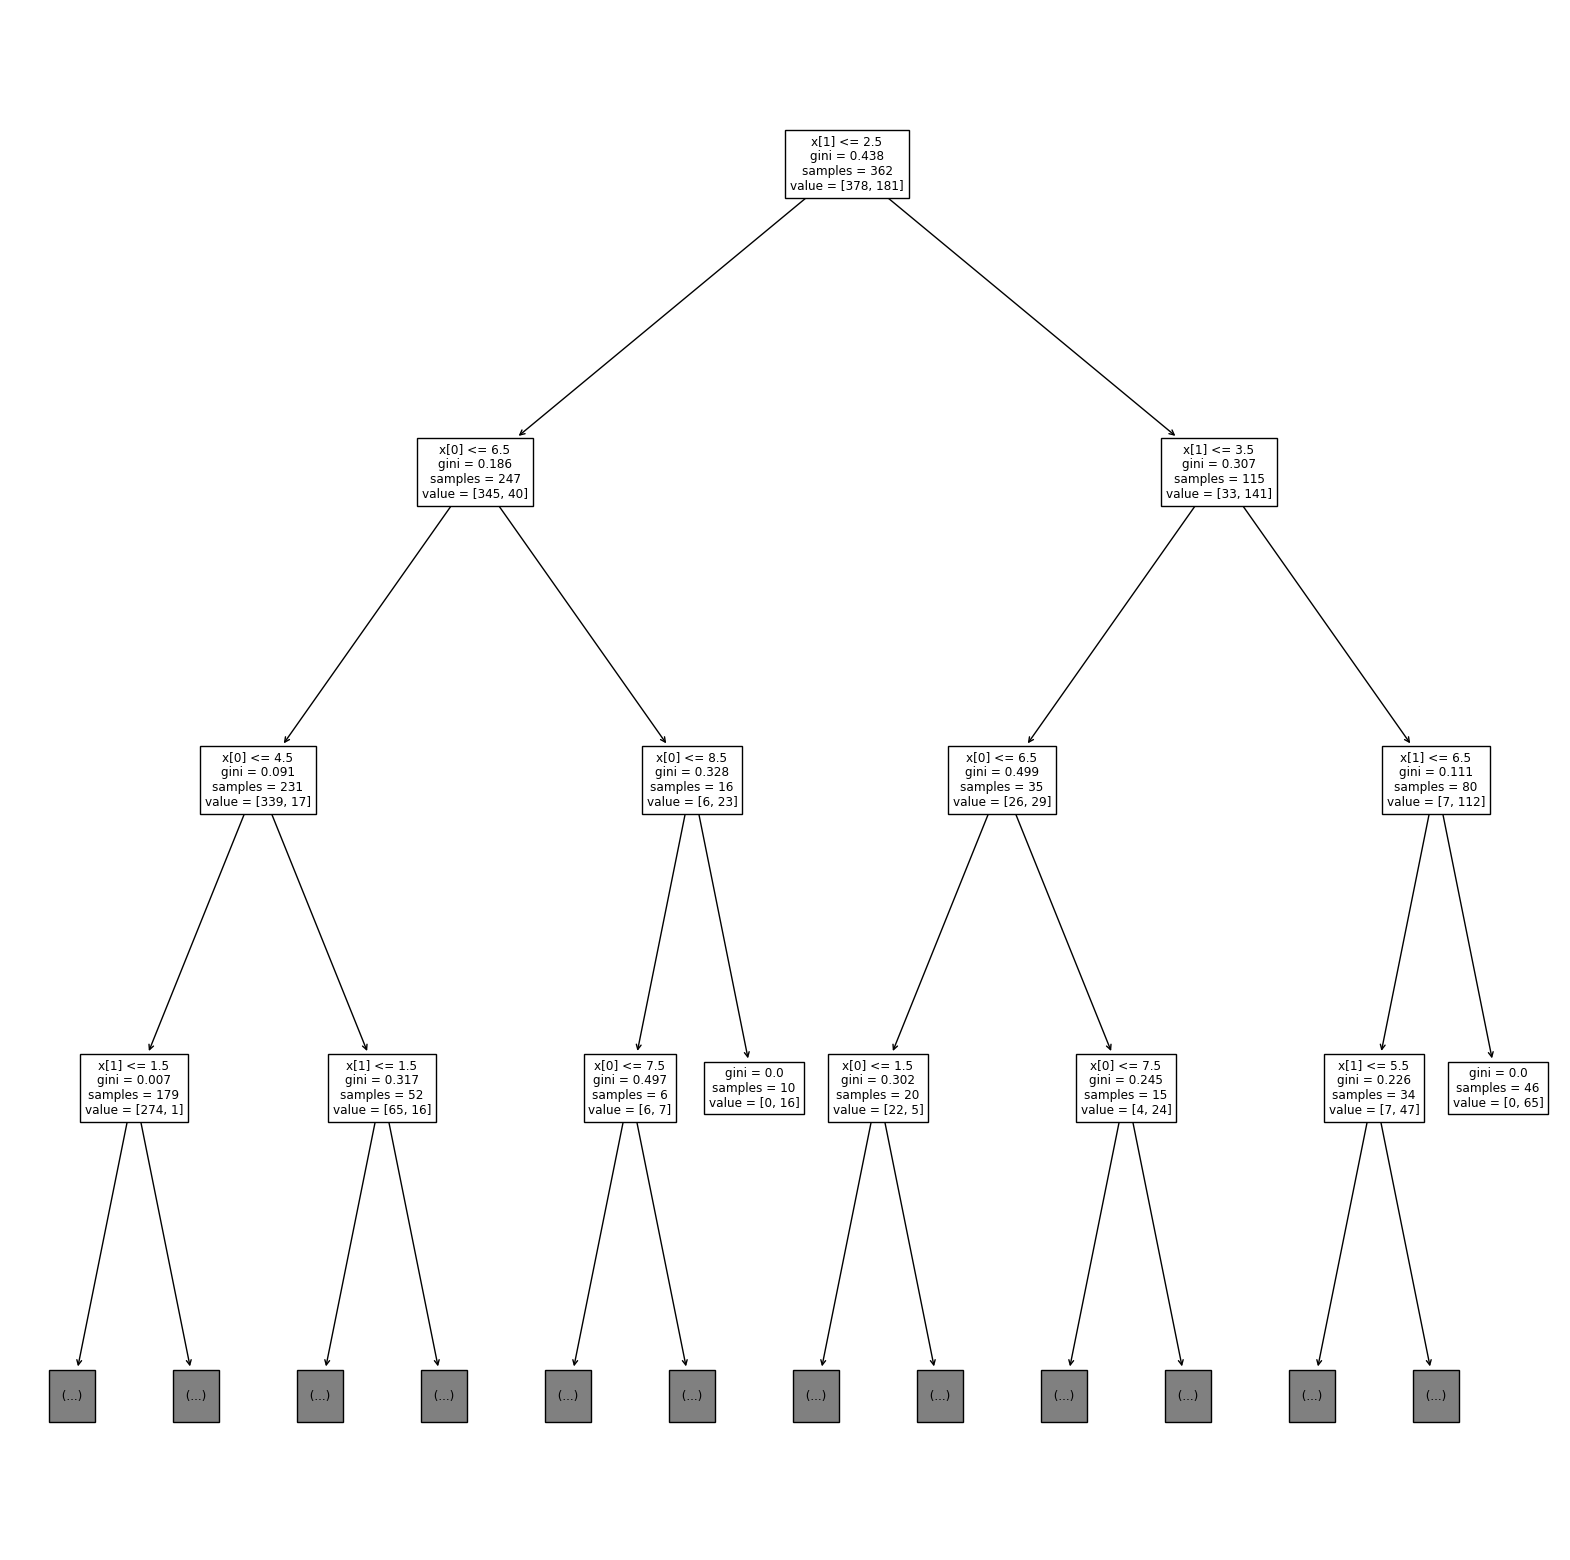

In [76]:
# Bagging tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(bg_model.estimators_[0],max_depth=3)
plt.show()

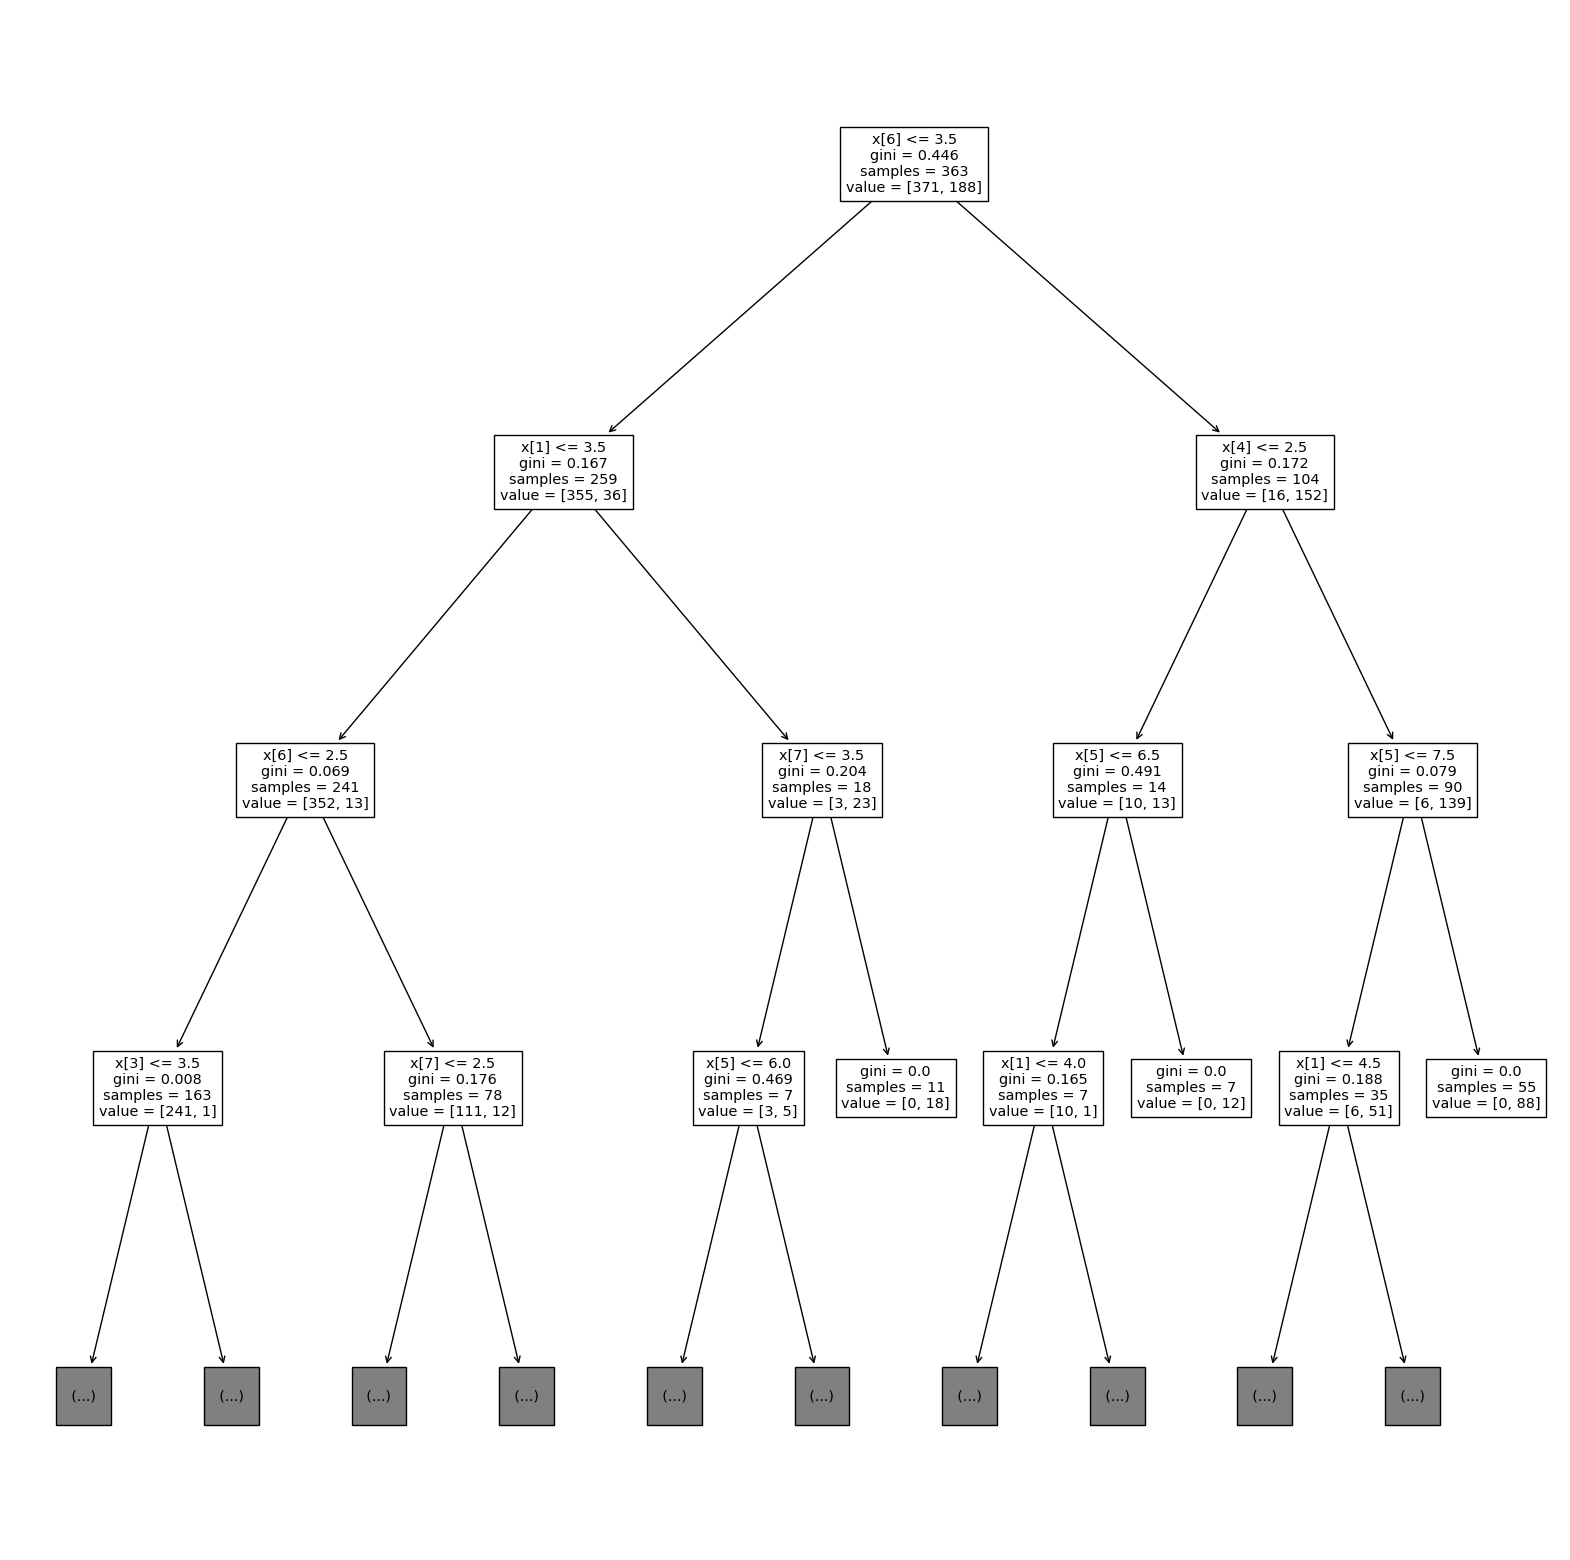

In [77]:
# Random forest tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(rf_model.estimators_[0],max_depth=3)
plt.show()

In [78]:
et=ExtraTreesClassifier()

In [79]:
et.fit(X_train,Y_train)

ExtraTreesClassifier()

In [80]:
#ccp_alpha -->cost_complexity_pruning technique

In [81]:
dt=DecisionTreeClassifier()

In [82]:
path=dt.cost_complexity_pruning_path(X_train,Y_train)
# it will return two values ccp_alpha,impurities

In [83]:
ccp_alpha,impurities=path.ccp_alphas,path.impurities
print("ccp alpha value",ccp_alpha)
print("impurities",impurities)

ccp alpha value [0.         0.00118329 0.00166113 0.00237203 0.00238521 0.00238521
 0.00246706 0.00286225 0.00298151 0.00351895 0.00439096 0.00530807
 0.0095775  0.01041303 0.03991082 0.32767691]
impurities [0.         0.00354987 0.00687212 0.01398823 0.01637344 0.01875865
 0.02615982 0.02902208 0.03200359 0.03904149 0.04343245 0.05404859
 0.06362609 0.07403912 0.11394994 0.44162685]


In [84]:
# finding the best value of ccp alpha

In [85]:
dt_prunning=[]
for x in ccp_alpha:
    dt=DecisionTreeClassifier(random_state=100,ccp_alpha=x)
    dt.fit(X_train,Y_train)
    dt_prunning.append(dt)

In [86]:
train_scores=[dt.score(X_train,Y_train)for dt in dt_prunning]
test_scores=[dt.score(X_test,Y_test)for dt in dt_prunning]

In [87]:
# plot the graph with r. to ccp alpha

Text(0, 0.5, 'accuracy')

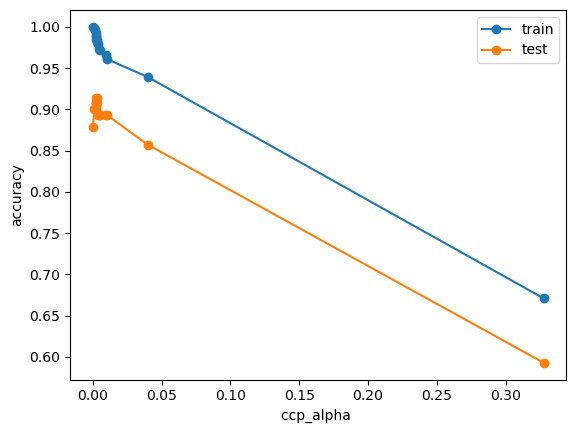

In [88]:
plt.plot(ccp_alpha,train_scores,label="train",marker="o")
plt.plot(ccp_alpha,test_scores,label="test",marker="o")
plt.legend()
plt.xlabel("ccp_alpha ")
plt.ylabel("accuracy")

In [89]:
dt=DecisionTreeClassifier(ccp_alpha=0.00)

In [90]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [91]:
dt.score(X_train,Y_train)

1.0

In [92]:
dt.score(X_test,Y_test)

0.8714285714285714

# Gradient decent 

In [93]:
def gradient_descent(x,y):
    
    m = 0
    c = 0
    learning_rate = 0.01
    iterations = 1000
    n = len(x)
    
    for i in range(iterations):
        y_pred = m * x + c
        
        cost = (1/n) * sum([val**2 for val in (y - y_pred)])
        
        dm = (-2/n) * sum((y - y_pred)* x)
        dc = (-2/n) * sum((y - y_pred))
        
        m = m - learning_rate * dm
        c = c - learning_rate * dc
        
        print("Iteration = {} | Slope = {} | Intercept = {} | Cost = {}".format(i+1,m,c,cost))

In [94]:
x = np.array([1,2,3,4,5])
y = np.array([15,24,33,42,51])

In [95]:
gradient_descent(x,y)

Iteration = 1 | Slope = 2.34 | Intercept = 0.66 | Cost = 1251.0
Iteration = 2 | Slope = 4.1256 | Intercept = 1.1664 | Cost = 729.8136000000001
Iteration = 3 | Slope = 5.487984000000001 | Intercept = 1.555536 | Cost = 426.08661696
Iteration = 4 | Slope = 6.527295360000001 | Intercept = 1.85514624 | Cost = 249.08425255065592
Iteration = 5 | Slope = 7.319981606400001 | Intercept = 2.0864055936 | Cost = 145.93075804207956
Iteration = 6 | Slope = 7.924401317376001 | Intercept = 2.265478585344 | Cost = 85.81276453603536
Iteration = 7 | Slope = 8.38510431243264 | Intercept = 2.4047049345945597 | Cost = 50.773765866222234
Iteration = 8 | Slope = 8.736099067621785 | Intercept = 2.51350457715671 | Cost = 30.349598967307095
Iteration = 9 | Slope = 9.003346998115589 | Intercept = 2.599068541556269 | Cost = 18.44226741364256
Iteration = 10 | Slope = 9.206666546036782 | Intercept = 2.666886350838208 | Cost = 11.498160544296486
Iteration = 11 | Slope = 9.361186724858397 | Intercept = 2.72114863105923

In [96]:
import pandas as pd
Dataset=pd.read_csv("Advertising.csv")
Dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Advertising.csv'

In [97]:
Dataset=Dataset.drop(["Unnamed: 0"],axis=1)

NameError: name 'Dataset' is not defined

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scale=StandardScaler()
df_scaled=scale.fit_transform(Dataset)
df_scaled=pd.DataFrame(df_scaled,columns=Dataset.columns)

In [128]:
x1=df_scaled["Newspaper"]
y1=df_scaled["Sales"]

In [130]:
gradient_descent(x1,y1)

Iteration = 1 | Slope = 0.004565980527523306 | Intercept = -4.297950884080138e-18 | Cost = 0.9999999999999992
Iteration = 2 | Slope = 0.009040641444496143 | Intercept = -8.022749131697538e-18 | Cost = 0.9979360303604051
Iteration = 3 | Slope = 0.013425809143129526 | Intercept = -1.1408929356804266e-17 | Cost = 0.995953793918539
Iteration = 4 | Slope = 0.017723273487790243 | Intercept = -1.4076240173466203e-17 | Cost = 0.994050054039771
Iteration = 5 | Slope = 0.021934788545557745 | Intercept = -1.7909285165984556e-17 | Cost = 0.9922217022602015
Iteration = 6 | Slope = 0.026062073302169895 | Intercept = -2.0813906154160123e-17 | Cost = 0.9904657532111018
Iteration = 7 | Slope = 0.0301068123636498 | Intercept = -2.3628321521584896e-17 | Cost = 0.9887793397443482
Iteration = 8 | Slope = 0.03407065664390011 | Intercept = -2.6333102365327934e-17 | Cost = 0.9871597082508774
Iteration = 9 | Slope = 0.03795522403854542 | Intercept = -2.906980212102894e-17 | Cost = 0.9856042141645481
Iteration 

Iteration = 138 | Slope = 0.2142481793708234 | Intercept = -2.0763876729112956e-16 | Cost = 0.9480851213003508
Iteration = 139 | Slope = 0.21452919631093026 | Intercept = -2.0817583767929198e-16 | Cost = 0.9480769808572626
Iteration = 140 | Slope = 0.21480459291223497 | Intercept = -2.082188588214962e-16 | Cost = 0.9480691627757196
Iteration = 141 | Slope = 0.21507448158151357 | Intercept = -2.0846449566569452e-16 | Cost = 0.9480616542902078
Iteration = 142 | Slope = 0.2153389724774066 | Intercept = -2.0889609486651755e-16 | Cost = 0.9480544431407212
Iteration = 143 | Slope = 0.21559817355538177 | Intercept = -2.0971349656839782e-16 | Cost = 0.948047517552754
Iteration = 144 | Slope = 0.21585219061179745 | Intercept = -2.1029220031998369e-16 | Cost = 0.9480408662180712
Iteration = 145 | Slope = 0.2161011273270848 | Intercept = -2.1046012155245824e-16 | Cost = 0.9480344782762398
Iteration = 146 | Slope = 0.21634508530806643 | Intercept = -2.1035603814389963e-16 | Cost = 0.94802834329690

Iteration = 251 | Slope = 0.22686601691358416 | Intercept = -2.300361290341611e-16 | Cost = 0.9478816927440744
Iteration = 252 | Slope = 0.22689467710283578 | Intercept = -2.299598012012181e-16 | Cost = 0.9478816080718151
Iteration = 253 | Slope = 0.22692276408830236 | Intercept = -2.298612689077826e-16 | Cost = 0.9478815267525768
Iteration = 254 | Slope = 0.2269502893340596 | Intercept = -2.301596413456506e-16 | Cost = 0.9478814486535803
Iteration = 255 | Slope = 0.22697726407490174 | Intercept = -2.302359691785936e-16 | Cost = 0.947881373647304
Iteration = 256 | Slope = 0.227003699320927 | Intercept = -2.3032895035690595e-16 | Cost = 0.9478813016112757
Iteration = 257 | Slope = 0.22702960586203177 | Intercept = -2.30519076049873e-16 | Cost = 0.9478812324278748
Iteration = 258 | Slope = 0.22705499427231446 | Intercept = -2.302984192237288e-16 | Cost = 0.9478811659841363
Iteration = 259 | Slope = 0.22707987491439147 | Intercept = -2.3061344500696617e-16 | Cost = 0.9478811021715703
Iter

Iteration = 340 | Slope = 0.2280616870009273 | Intercept = -2.361853768118036e-16 | Cost = 0.947879613208318
Iteration = 341 | Slope = 0.22806643378843205 | Intercept = -2.360979467486144e-16 | Cost = 0.947879610885674
Iteration = 342 | Slope = 0.22807108564018672 | Intercept = -2.3613264121813394e-16 | Cost = 0.9478796086550066
Iteration = 343 | Slope = 0.2280756444549063 | Intercept = -2.3631999135353944e-16 | Cost = 0.9478796065126739
Iteration = 344 | Slope = 0.22808011209333148 | Intercept = -2.361964790420499e-16 | Cost = 0.9478796044551773
Iteration = 345 | Slope = 0.22808449037898815 | Intercept = -2.357593287261037e-16 | Cost = 0.9478796024791574
Iteration = 346 | Slope = 0.2280887810989317 | Intercept = -2.358328810014851e-16 | Cost = 0.9478796005813888
Iteration = 347 | Slope = 0.22809298600447636 | Intercept = -2.3618954014814594e-16 | Cost = 0.9478795987587719
Iteration = 348 | Slope = 0.22809710681191014 | Intercept = -2.3569687868096854e-16 | Cost = 0.9478795970083295
It

Iteration = 430 | Slope = 0.22826050368605125 | Intercept = -2.35438751827743e-16 | Cost = 0.9478795561008821
Iteration = 431 | Slope = 0.22826127413985353 | Intercept = -2.360146800217673e-16 | Cost = 0.9478795560396917
Iteration = 432 | Slope = 0.22826202918457977 | Intercept = -2.3505572488424733e-16 | Cost = 0.9478795559809261
Iteration = 433 | Slope = 0.22826276912841148 | Intercept = -2.3468518794977866e-16 | Cost = 0.9478795559244868
Iteration = 434 | Slope = 0.22826349427336656 | Intercept = -2.3470878018905194e-16 | Cost = 0.9478795558702828
Iteration = 435 | Slope = 0.22826420491542254 | Intercept = -2.341883631462589e-16 | Cost = 0.9478795558182261
Iteration = 436 | Slope = 0.2282649013446374 | Intercept = -2.346671468256285e-16 | Cost = 0.9478795557682287
Iteration = 437 | Slope = 0.22826558384526796 | Intercept = -2.346962901800249e-16 | Cost = 0.9478795557202123
Iteration = 438 | Slope = 0.2282662526958859 | Intercept = -2.347032290739288e-16 | Cost = 0.9478795556740982
I

Iteration = 590 | Slope = 0.22829750621820535 | Intercept = -2.3574406315951456e-16 | Cost = 0.9478795545581008
Iteration = 591 | Slope = 0.22829753662136457 | Intercept = -2.353763017826075e-16 | Cost = 0.9478795545580053
Iteration = 592 | Slope = 0.2282975664164606 | Intercept = -2.360771300669021e-16 | Cost = 0.947879554557915
Iteration = 593 | Slope = 0.22829759561565469 | Intercept = -2.3589533104661973e-16 | Cost = 0.9478795545578264
Iteration = 594 | Slope = 0.2282976242308649 | Intercept = -2.357107564687758e-16 | Cost = 0.947879554557742
Iteration = 595 | Slope = 0.22829765227377088 | Intercept = -2.3576765539878784e-16 | Cost = 0.9478795545576614
Iteration = 596 | Slope = 0.22829767975581877 | Intercept = -2.357801454078149e-16 | Cost = 0.9478795545575832
Iteration = 597 | Slope = 0.22829770668822572 | Intercept = -2.3575377761098005e-16 | Cost = 0.9478795545575082
Iteration = 598 | Slope = 0.2282977330819845 | Intercept = -2.360105166854246e-16 | Cost = 0.9478795545574364
It

Iteration = 689 | Slope = 0.22829882065915155 | Intercept = -2.3576210428366457e-16 | Cost = 0.9478795545557394
Iteration = 690 | Slope = 0.22829882477349184 | Intercept = -2.352805450467334e-16 | Cost = 0.9478795545557371
Iteration = 691 | Slope = 0.2282988288055453 | Intercept = -2.351764616381748e-16 | Cost = 0.9478795545557358
Iteration = 692 | Slope = 0.2282988327569577 | Intercept = -2.34889191430553e-16 | Cost = 0.9478795545557341
Iteration = 693 | Slope = 0.22829883662934186 | Intercept = -2.3525140169233696e-16 | Cost = 0.9478795545557321
Iteration = 694 | Slope = 0.22829884042427834 | Intercept = -2.3528054504673335e-16 | Cost = 0.9478795545557311
Iteration = 695 | Slope = 0.22829884414331608 | Intercept = -2.3543736404896164e-16 | Cost = 0.9478795545557298
Iteration = 696 | Slope = 0.22829884778797307 | Intercept = -2.3579679875318403e-16 | Cost = 0.9478795545557281
Iteration = 697 | Slope = 0.22829885135973693 | Intercept = -2.3589533104661953e-16 | Cost = 0.947879554555727

Iteration = 796 | Slope = 0.22829900269187864 | Intercept = -2.3697085960172506e-16 | Cost = 0.9478795545556955
Iteration = 797 | Slope = 0.22829900316556437 | Intercept = -2.3650595371016327e-16 | Cost = 0.9478795545556956
Iteration = 798 | Slope = 0.2282990036297764 | Intercept = -2.366322415792144e-16 | Cost = 0.9478795545556952
Iteration = 799 | Slope = 0.2282990040847042 | Intercept = -2.367918361390043e-16 | Cost = 0.947879554555696
Iteration = 800 | Slope = 0.22829900453053342 | Intercept = -2.3635191026549655e-16 | Cost = 0.9478795545556955
Iteration = 801 | Slope = 0.22829900496744607 | Intercept = -2.3667248716385705e-16 | Cost = 0.9478795545556952
Iteration = 802 | Slope = 0.22829900539562045 | Intercept = -2.3659615933091405e-16 | Cost = 0.9478795545556955
Iteration = 803 | Slope = 0.22829900581523135 | Intercept = -2.3707494301028367e-16 | Cost = 0.9478795545556952
Iteration = 804 | Slope = 0.22829900622645002 | Intercept = -2.368237550509622e-16 | Cost = 0.947879554555695

Iteration = 903 | Slope = 0.22829902364938343 | Intercept = -2.358953310466194e-16 | Cost = 0.9478795545556951
Iteration = 904 | Slope = 0.22829902370391905 | Intercept = -2.3652121927675183e-16 | Cost = 0.9478795545556952
Iteration = 905 | Slope = 0.22829902375736397 | Intercept = -2.3572047092024093e-16 | Cost = 0.9478795545556946
Iteration = 906 | Slope = 0.22829902380974 | Intercept = -2.356191630692439e-16 | Cost = 0.947879554555695
Iteration = 907 | Slope = 0.22829902386106848 | Intercept = -2.360507622700669e-16 | Cost = 0.9478795545556957
Iteration = 908 | Slope = 0.2282990239113704 | Intercept = -2.3598553666737016e-16 | Cost = 0.9478795545556953
Iteration = 909 | Slope = 0.22829902396066631 | Intercept = -2.358481465680728e-16 | Cost = 0.9478795545556952
Iteration = 910 | Slope = 0.22829902400897628 | Intercept = -2.3574683871707577e-16 | Cost = 0.9478795545556951
Iteration = 911 | Slope = 0.22829902405632005 | Intercept = -2.3605353782762844e-16 | Cost = 0.9478795545556946
I

In [98]:
# please do this assignment to use three input variable in the Gradient decent function

def gradient_descent(x1,x2,x3,y):
    
    m1 = 0
    m2=0
    m3=0
    c = 0
    learning_rate = 0.01
    iterations = 1000
    n = len(x1)
    
    for i in range(iterations):
        y_pred = m * x + c
        
        cost = (1/n) * sum([val**2 for val in (y - y_pred)])
        
        dm = (-2/n) * sum((y - y_pred)* x)
        dc = (-2/n) * sum((y - y_pred))
        
        m = m - learning_rate * dm
        c = c - learning_rate * dc
        
        print("Iteration = {} | Slope = {} | Intercept = {} | Cost = {}".format(i+1,m,c,cost))

# Boosting

In [ ]:
# ada boost and gradient boost both works by sequentially adding predictors - as an ensemble correcting approch .

(1)Adaptive Boosting(Ada Boost)

when an observation is wrongly classified, its weight gets updated & for those coreectly classified , 
their weights get decresed. Due to the update of weight , The probability of selecting wrongly classified observation 
will be high with respect to the correct classified observation.
Adaboost - works on the principal of stagewise addition method where multiple no. of weak learner are used for getting strong 
learners.

(2)Gradient Boosting :-method tries to fit the new predictor to the residual error made by the previous predictor.

In [99]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [100]:
ada=AdaBoostClassifier(estimator=rf)

In [101]:
ada.fit(X_train,Y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(oob_score=True))

In [102]:
ada.score(X_train,Y_train)

1.0

In [103]:
ada.score(X_test,Y_test)

0.9214285714285714

In [104]:
gb=GradientBoostingClassifier()

In [105]:
gb.fit(X_train,Y_train)

GradientBoostingClassifier()

In [106]:
gb.score(X_train,Y_train)

1.0

In [107]:
gb.score(X_test,Y_test)

0.9142857142857143

In [108]:
y_pred=gb.predict(X_test)

In [109]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        83
           1       0.89      0.89      0.89        57

    accuracy                           0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.91      0.91      0.91       140



In [ ]:
# basic difference of ADA BOOST nad Gradient boosting 
(1)Ada boost -- the shortcomings(of existing weak learners ) are identified by the high weight data points.
(2)Gradient boosting--- the shortcomings(of existing weak learners ) are identified by gradients

# XGBOOST 

In [ ]:
-- next version of gradient boosting (Xtreme gradient boosting )
-- regularized form of Gradient boosting algorithm
--- XGBoost learns from its mistakes(gradient boosting mistake)
---XGB has extensive no. of hyper parameters 

In [ ]:
#! pip install XGB

In [110]:
from xgboost import XGBClassifier,XGBRegressor

In [113]:
xb=XGBClassifier()

In [114]:
xb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [115]:
y_predict=xb.predict(X_test)

In [116]:
xb.score(X_train,Y_train)

1.0

In [117]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        83
           1       0.89      0.88      0.88        57

    accuracy                           0.91       140
   macro avg       0.90      0.90      0.90       140
weighted avg       0.91      0.91      0.91       140



In [118]:
# XGB is high performing algorithm
# when the no. of rows are very high , it take less computational time.

# Catboost 
#### the base estimator DT grown by symettric

In [ ]:
#!pip install catboost

In [119]:
from catboost import CatBoostClassifier,CatBoostRegressor

In [120]:
cat=CatBoostClassifier()

In [121]:
cat.fit(X_train,Y_train)

Learning rate set to 0.008037
0:	learn: 0.6764633	total: 439ms	remaining: 7m 18s
1:	learn: 0.6607221	total: 441ms	remaining: 3m 40s
2:	learn: 0.6435372	total: 444ms	remaining: 2m 27s
3:	learn: 0.6259467	total: 447ms	remaining: 1m 51s
4:	learn: 0.6091365	total: 455ms	remaining: 1m 30s
5:	learn: 0.5937277	total: 465ms	remaining: 1m 17s
6:	learn: 0.5776425	total: 469ms	remaining: 1m 6s
7:	learn: 0.5623495	total: 471ms	remaining: 58.4s
8:	learn: 0.5470187	total: 474ms	remaining: 52.2s
9:	learn: 0.5338625	total: 477ms	remaining: 47.2s
10:	learn: 0.5194347	total: 479ms	remaining: 43.1s
11:	learn: 0.5099044	total: 482ms	remaining: 39.7s
12:	learn: 0.4983678	total: 484ms	remaining: 36.7s
13:	learn: 0.4885234	total: 487ms	remaining: 34.3s
14:	learn: 0.4756447	total: 489ms	remaining: 32.1s
15:	learn: 0.4697861	total: 532ms	remaining: 32.7s
16:	learn: 0.4574308	total: 535ms	remaining: 30.9s
17:	learn: 0.4485638	total: 537ms	remaining: 29.3s
18:	learn: 0.4374842	total: 540ms	remaining: 27.9s
19:	l

174:	learn: 0.0585025	total: 1.21s	remaining: 5.72s
175:	learn: 0.0581144	total: 1.22s	remaining: 5.69s
176:	learn: 0.0577627	total: 1.22s	remaining: 5.67s
177:	learn: 0.0574542	total: 1.22s	remaining: 5.64s
178:	learn: 0.0572250	total: 1.23s	remaining: 5.64s
179:	learn: 0.0568203	total: 1.23s	remaining: 5.61s
180:	learn: 0.0563495	total: 1.23s	remaining: 5.59s
181:	learn: 0.0560248	total: 1.24s	remaining: 5.56s
182:	learn: 0.0556254	total: 1.24s	remaining: 5.54s
183:	learn: 0.0553111	total: 1.24s	remaining: 5.51s
184:	learn: 0.0550844	total: 1.24s	remaining: 5.48s
185:	learn: 0.0547439	total: 1.25s	remaining: 5.46s
186:	learn: 0.0543487	total: 1.25s	remaining: 5.43s
187:	learn: 0.0540287	total: 1.25s	remaining: 5.41s
188:	learn: 0.0538224	total: 1.25s	remaining: 5.38s
189:	learn: 0.0535137	total: 1.26s	remaining: 5.36s
190:	learn: 0.0531966	total: 1.26s	remaining: 5.33s
191:	learn: 0.0529889	total: 1.26s	remaining: 5.31s
192:	learn: 0.0526071	total: 1.26s	remaining: 5.29s
193:	learn: 

367:	learn: 0.0249081	total: 1.78s	remaining: 3.07s
368:	learn: 0.0248355	total: 1.79s	remaining: 3.06s
369:	learn: 0.0247655	total: 1.79s	remaining: 3.05s
370:	learn: 0.0246974	total: 1.79s	remaining: 3.04s
371:	learn: 0.0246103	total: 1.79s	remaining: 3.03s
372:	learn: 0.0245081	total: 1.8s	remaining: 3.02s
373:	learn: 0.0244289	total: 1.8s	remaining: 3.01s
374:	learn: 0.0243359	total: 1.8s	remaining: 3s
375:	learn: 0.0242629	total: 1.8s	remaining: 2.99s
376:	learn: 0.0241809	total: 1.81s	remaining: 2.98s
377:	learn: 0.0241139	total: 1.81s	remaining: 2.98s
378:	learn: 0.0240203	total: 1.81s	remaining: 2.97s
379:	learn: 0.0239394	total: 1.81s	remaining: 2.96s
380:	learn: 0.0238808	total: 1.82s	remaining: 2.95s
381:	learn: 0.0238083	total: 1.82s	remaining: 2.95s
382:	learn: 0.0237424	total: 1.82s	remaining: 2.94s
383:	learn: 0.0236406	total: 1.83s	remaining: 2.93s
384:	learn: 0.0235648	total: 1.83s	remaining: 2.92s
385:	learn: 0.0234709	total: 1.83s	remaining: 2.92s
386:	learn: 0.02341

567:	learn: 0.0143799	total: 2.35s	remaining: 1.79s
568:	learn: 0.0143466	total: 2.35s	remaining: 1.78s
569:	learn: 0.0143145	total: 2.35s	remaining: 1.77s
570:	learn: 0.0142692	total: 2.36s	remaining: 1.77s
571:	learn: 0.0142323	total: 2.36s	remaining: 1.76s
572:	learn: 0.0142018	total: 2.36s	remaining: 1.76s
573:	learn: 0.0141683	total: 2.36s	remaining: 1.75s
574:	learn: 0.0141381	total: 2.37s	remaining: 1.75s
575:	learn: 0.0141111	total: 2.37s	remaining: 1.74s
576:	learn: 0.0140781	total: 2.37s	remaining: 1.74s
577:	learn: 0.0140299	total: 2.37s	remaining: 1.73s
578:	learn: 0.0139955	total: 2.38s	remaining: 1.73s
579:	learn: 0.0139585	total: 2.38s	remaining: 1.72s
580:	learn: 0.0139336	total: 2.38s	remaining: 1.72s
581:	learn: 0.0139144	total: 2.39s	remaining: 1.71s
582:	learn: 0.0138747	total: 2.39s	remaining: 1.71s
583:	learn: 0.0138349	total: 2.39s	remaining: 1.7s
584:	learn: 0.0137950	total: 2.4s	remaining: 1.7s
585:	learn: 0.0137705	total: 2.4s	remaining: 1.69s
586:	learn: 0.01

786:	learn: 0.0090531	total: 3.09s	remaining: 836ms
787:	learn: 0.0090350	total: 3.09s	remaining: 832ms
788:	learn: 0.0090133	total: 3.1s	remaining: 828ms
789:	learn: 0.0089913	total: 3.1s	remaining: 824ms
790:	learn: 0.0089705	total: 3.1s	remaining: 820ms
791:	learn: 0.0089514	total: 3.11s	remaining: 816ms
792:	learn: 0.0089331	total: 3.11s	remaining: 812ms
793:	learn: 0.0089154	total: 3.11s	remaining: 807ms
794:	learn: 0.0088937	total: 3.12s	remaining: 804ms
795:	learn: 0.0088710	total: 3.12s	remaining: 800ms
796:	learn: 0.0088577	total: 3.12s	remaining: 796ms
797:	learn: 0.0088282	total: 3.13s	remaining: 792ms
798:	learn: 0.0088141	total: 3.13s	remaining: 787ms
799:	learn: 0.0087991	total: 3.13s	remaining: 784ms
800:	learn: 0.0087839	total: 3.14s	remaining: 780ms
801:	learn: 0.0087659	total: 3.14s	remaining: 775ms
802:	learn: 0.0087473	total: 3.14s	remaining: 771ms
803:	learn: 0.0087324	total: 3.15s	remaining: 767ms
804:	learn: 0.0087149	total: 3.15s	remaining: 763ms
805:	learn: 0.0

977:	learn: 0.0063558	total: 3.66s	remaining: 82.4ms
978:	learn: 0.0063445	total: 3.67s	remaining: 78.7ms
979:	learn: 0.0063347	total: 3.67s	remaining: 75ms
980:	learn: 0.0063214	total: 3.67s	remaining: 71.2ms
981:	learn: 0.0063113	total: 3.68s	remaining: 67.4ms
982:	learn: 0.0063023	total: 3.68s	remaining: 63.7ms
983:	learn: 0.0062921	total: 3.69s	remaining: 60ms
984:	learn: 0.0062813	total: 3.69s	remaining: 56.2ms
985:	learn: 0.0062739	total: 3.69s	remaining: 52.4ms
986:	learn: 0.0062651	total: 3.69s	remaining: 48.7ms
987:	learn: 0.0062559	total: 3.7s	remaining: 44.9ms
988:	learn: 0.0062448	total: 3.7s	remaining: 41.2ms
989:	learn: 0.0062356	total: 3.7s	remaining: 37.4ms
990:	learn: 0.0062275	total: 3.71s	remaining: 33.7ms
991:	learn: 0.0062154	total: 3.71s	remaining: 29.9ms
992:	learn: 0.0062055	total: 3.71s	remaining: 26.2ms
993:	learn: 0.0061966	total: 3.72s	remaining: 22.4ms
994:	learn: 0.0061859	total: 3.72s	remaining: 18.7ms
995:	learn: 0.0061778	total: 3.72s	remaining: 15ms
99

In [123]:
y_predict=cat.predict(X_test)

In [124]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        83
           1       0.90      0.91      0.90        57

    accuracy                           0.92       140
   macro avg       0.92      0.92      0.92       140
weighted avg       0.92      0.92      0.92       140



# lightGBM

In [ ]:
#Light GBM--- LIGHT GRADIENT BOOSTING 
decision trees are grown leaf wise -- that means at asingle time only one leaf from the whole tree will be grown.

In [ ]:
#!pip install Lightgbm

In [125]:
from lightgbm import LGBMClassifier,LGBMRegressor

In [126]:
lg=LGBMClassifier()

In [127]:
lg.fit(X_train,Y_train)

[LightGBM] [Info] Number of positive: 184, number of negative: 375
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 559, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329159 -> initscore=-0.711990
[LightGBM] [Info] Start training from score -0.711990
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier()

In [128]:
y_predict=lg.predict(X_test)

In [129]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        83
           1       0.90      0.91      0.90        57

    accuracy                           0.92       140
   macro avg       0.92      0.92      0.92       140
weighted avg       0.92      0.92      0.92       140



In [ ]:
# which algorithm  we should use?
-->depends on the dataset.
--> if we need regularization --- according to the dataset -- XGBoost id best option.
---> if we have huge dataset with categorical datas-- catBoost and LightGBM  will give better result.

In [ ]:
# Voting classifier ---- we can combine RF,KNN,LG,XGB,ADB... FINALLY WILL GET A BETTER RESULT (MAJORITY CLASS RESULT)


#stacking classifier---- we can combine RF,KNN,LG,XGB,ADB... FINALLY WILL MAKE STORGER ONE PARTICULAR ALGORITHM
#voting=soft/hard
#WE can assign the weight to individual alorithms 

# voting classifier

In [ ]:
Voting classifier:- It combine the different Machine learning algorithms and use the majority vote and predict the class labels.
    (in case of regression it uses the average).
- voting classifier-- effective becoz it combine all the estimators and handles the individual's limitation.

-types of Voting classifier

-soft voting classifier-- different weights configured to different estimators.
-Hard voting classifier--  all estimators has the equal weightages.

In [130]:
from sklearn.ensemble import VotingClassifier

In [132]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [140]:
models=[("rf",RandomForestClassifier(n_estimators=50)),
           ("svc",SVC()),
           ("knc",KNeighborsClassifier()),
           ("abc",AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
           ("lr",LogisticRegression()),
        ("lg",LGBMClassifier())
           ]

In [141]:
vc=VotingClassifier(estimators=models,voting='hard')

In [142]:
vc.fit(X_train,Y_train)

[LightGBM] [Info] Number of positive: 184, number of negative: 375
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 559, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329159 -> initscore=-0.711990
[LightGBM] [Info] Start training from score -0.711990
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=50)),
                             ('svc', SVC()), ('knc', KNeighborsClassifier()),
                             ('abc',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
                             ('lr', LogisticRegression()),
                             ('lg', LGBMClassifier())])

In [143]:
vc.score(X_train,Y_train)

0.9964221824686941

In [144]:
vc.score(X_test,Y_test)

0.9214285714285714

In [149]:
models=[("rf",RandomForestClassifier(n_estimators=50)),
           ("svc",SVC(probability=True)),
           ("knc",KNeighborsClassifier()),
           ("abc",AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
           ("lr",LogisticRegression()),
        ("lg",LGBMClassifier())
           ]

In [150]:
vc1=VotingClassifier(estimators=models,voting='soft',weights=[1,2,3,0.3,1,1.1])

In [151]:
vc1.fit(X_train,Y_train)

[LightGBM] [Info] Number of positive: 184, number of negative: 375
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 559, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329159 -> initscore=-0.711990
[LightGBM] [Info] Start training from score -0.711990
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=50)),
                             ('svc', SVC(probability=True)),
                             ('knc', KNeighborsClassifier()),
                             ('abc',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
                             ('lr', LogisticRegression()),
                             ('lg', LGBMClassifier())],
                 voting='soft', weights=[1, 2, 3, 0.3, 1, 1.1])

In [152]:
vc1.score(X_train,Y_train)

0.9892665474060823

In [153]:
vc1.score(X_test,Y_test)

0.9214285714285714

In [ ]:
#checking the performance of individual estimators

In [154]:
for est, name in zip(vc1.estimators_,vc1.estimators):
    print(name[0],est.score(X_test,Y_test))

rf 0.9214285714285714
svc 0.9357142857142857
knc 0.9285714285714286
abc 0.8857142857142857
lr 0.9214285714285714
lg 0.9214285714285714


In [155]:
Y_pred=vc1.predict(X_test)

In [156]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        83
           1       0.90      0.91      0.90        57

    accuracy                           0.92       140
   macro avg       0.92      0.92      0.92       140
weighted avg       0.92      0.92      0.92       140



# Stacking classifier

In [ ]:
- ensemble learning method, that combine the multiple classification model to create one "super" model.
- The super model can learn from the strengths of individual models.

In [ ]:
- The individual models are trained on different subset of data (using some kind of cross validation technique)
then the predictions from each model are combined to make a final strong model prediction.

- Many a times it is also useful for dealing with imbalanced datasets.
- it can reduce the variance of the prediction.
- Stacking can be combine difeernt type of models(such as decision tree and NEURAL NETWORKS)

In [157]:
from sklearn.ensemble import StackingClassifier

In [158]:
models=[("rf",RandomForestClassifier(n_estimators=50)),
           ("svc",SVC(probability=True)),
           ("knc",KNeighborsClassifier()),
           ("abc",AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
           
        ("lg",LGBMClassifier())
           ]

In [159]:
lr=LogisticRegression()

In [161]:
sclf=StackingClassifier(estimators=models,final_estimator=lr,cv=10)

In [162]:
sclf.fit(X_train,Y_train)

[LightGBM] [Info] Number of positive: 184, number of negative: 375
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 559, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329159 -> initscore=-0.711990
[LightGBM] [Info] Start training from score -0.711990
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330020 -> initscore=-0.708095
[LightGBM] [Info] Start training from score -0.708095
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

[LightGBM] [Info] Number of positive: 166, number of negative: 337
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 503, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330020 -> initscore=-0.708095
[LightGBM] [Info] Start training from score -0.708095
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

StackingClassifier(cv=10,
                   estimators=[('rf', RandomForestClassifier(n_estimators=50)),
                               ('svc', SVC(probability=True)),
                               ('knc', KNeighborsClassifier()),
                               ('abc',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
                               ('lg', LGBMClassifier())],
                   final_estimator=LogisticRegression())

In [163]:
sclf.score(X_train,Y_train)

0.998211091234347

In [164]:
sclf.score(X_test,Y_test)

0.9214285714285714

In [ ]:
# XGBoost :-learn more about it 

 Dmatrix- internal data structure used by XGBoost.
    it help to optimize both memory efficient and training speed.